In [40]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tabular-playground-series-feb-2021/sample_submission.csv
/kaggle/input/tabular-playground-series-feb-2021/train.csv
/kaggle/input/tabular-playground-series-feb-2021/test.csv


In [41]:
# import datasets

df_train = pd.read_csv('/kaggle/input/tabular-playground-series-feb-2021/train.csv')

df_test = pd.read_csv('/kaggle/input/tabular-playground-series-feb-2021/test.csv')

df_submission = pd.read_csv('/kaggle/input/tabular-playground-series-feb-2021/sample_submission.csv')

df_train.head()

,id,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,...,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,target
0,1,A,B,A,A,B,D,A,E,C,...,0.881122,0.421650,0.741413,0.895799,0.802461,0.724417,0.701915,0.877618,0.719903,6.994023
1,2,B,A,A,A,B,B,A,E,A,...,0.440011,0.346230,0.278495,0.593413,0.546056,0.613252,0.741289,0.326679,0.808464,8.071256
2,3,A,A,A,C,B,D,A,B,C,...,0.914155,0.369602,0.832564,0.865620,0.825251,0.264104,0.695561,0.869133,0.828352,5.760456
3,4,A,A,A,C,B,D,A,E,G,...,0.934138,0.578930,0.407313,0.868099,0.794402,0.494269,0.698125,0.809799,0.614766,7.806457
4,6,A,B,A,A,B,B,A,E,C,...,0.382600,0.705940,0.325193,0.440967,0.462146,0.724447,0.683073,0.343457,0.297743,6.868974


In [42]:
# check for null values

df_train.isnull().sum()

id        0
cat0      0
cat1      0
cat2      0
cat3      0
cat4      0
cat5      0
cat6      0
cat7      0
cat8      0
cat9      0
cont0     0
cont1     0
cont2     0
cont3     0
cont4     0
cont5     0
cont6     0
cont7     0
cont8     0
cont9     0
cont10    0
cont11    0
cont12    0
cont13    0
target    0
dtype: int64

In [43]:
# check the correlation between the continuous variables and the target variable

(df_train.corr()**2)['target'].sort_values(ascending = False)[1:]

cont0     1.537995e-03
cont1     1.351835e-03
cont5     6.415739e-04
cont7     5.512505e-04
cont10    4.431524e-04
cont11    4.278738e-04
cont8     3.704254e-04
cont4     2.530490e-04
cont6     2.254474e-04
cont3     2.930987e-05
cont13    2.474627e-05
cont12    1.256682e-05
cont2     3.260916e-06
id        4.054826e-07
cont9     3.482741e-09
Name: target, dtype: float64

In [44]:
def customized_scatterplot(y, x):
        ## Sizing the plot. 
    plt.subplots(figsize = (12,8))
    sns.scatterplot(y = y, x = x);

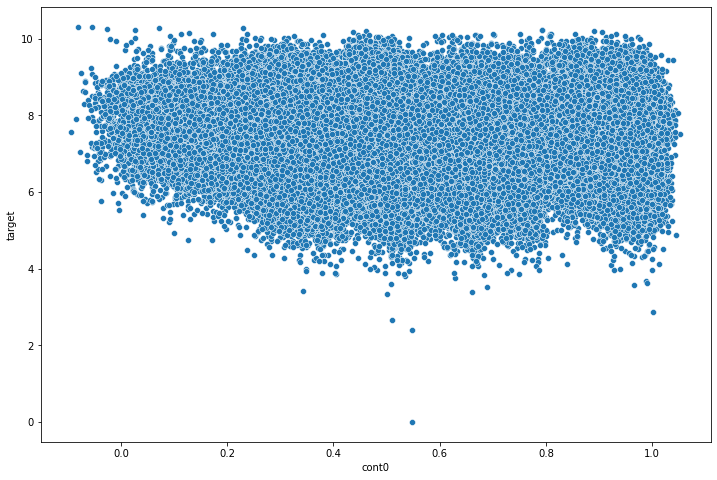

In [45]:
import matplotlib.pyplot as plt

# plot cont0 with respect to the target variable

customized_scatterplot(df_train.target, df_train.cont0)

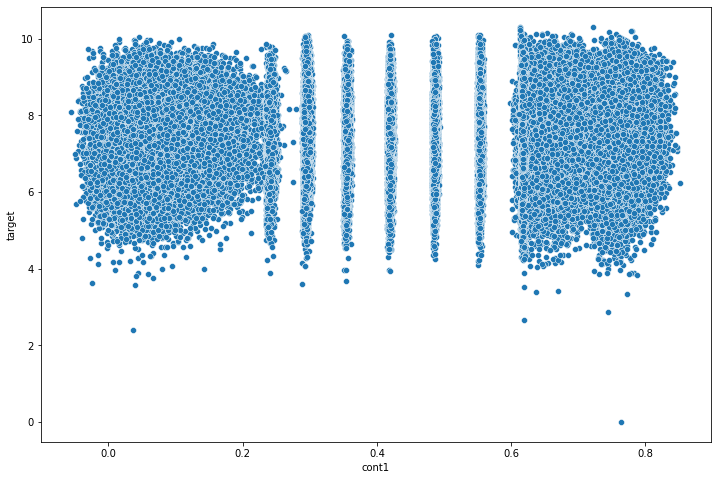

In [46]:
# plot cont1 with respect to the target variable

customized_scatterplot(df_train.target, df_train.cont1)

Our two most correlated continuous features are cont0 and cont1 and neither are very helpful in predicting the target variable. Hopefully the discrete variables will be more useful.

In [47]:
# lets look at the possible unique values the categorical features offer

for i in range(10):
    print(df_train.iloc[:,i+1].unique())

['A' 'B']
['B' 'A']
['A' 'B']
['A' 'C' 'D' 'B']
['B' 'C' 'A' 'D']
['D' 'B' 'A' 'C']
['A' 'B' 'D' 'C' 'E' 'I' 'G' 'H']
['E' 'B' 'D' 'G' 'F' 'A' 'C' 'I']
['C' 'A' 'G' 'E' 'D' 'F' 'B']
['I' 'F' 'N' 'K' 'B' 'L' 'G' 'H' 'O' 'A' 'J' 'M' 'C' 'D' 'E']


In [48]:
# my own label encoder since the scikit learn one is a bit confusing

def encode(dataframe):
    row, columns = dataframe.shape
    column_labels = dataframe.columns
    
    non_categorical_columns_list = []

    for i in column_labels:
        
        # find the unique values
        label_list = list(dataframe[i].unique())
        
        # check if the feature is categorical
        if len(label_list) > 30:
            non_categorical_columns_list.append(i)
            continue  
            
        # encode the labels with integers
        dataframe[i] = dataframe[i].map(lambda x: label_list.index(x))
                
    print('The non-categorical columns are:' + str(non_categorical_columns_list))        
    
    return dataframe

# encode the dataframe

df_train_encoded = encode(df_train)

df_train_encoded.head()

NameError: name 'new_dataframe' is not defined

In [ ]:
# comparing the correlation of label encododed variables and dummy variables

# check the correlation between the continuous variables and the target variable

(df_train_encoded.corr()**2)['target'].sort_values(ascending = False)[1:]